## Abstract

In this work we will to take a look at a data visualization using Python and the Titanic dataset. It's not intended to be the most accurate Titanic dataset analysis about Titanic, it's a project resultant of the course Data Analyst Nanodegree by Udacity,however it is a serious project, so I believe it will be interesting to demonstrate the process to generate a data visualization and make some superficial conclusions about the data.

## Introdução

O núcleo desse trabalho será um conjunto de dados contendo dados demográficos e informações de 891 dos 2224 passageiros e tripulantes a bordo do Titanic. É possível encontrar mais informações sobre este conjunto de dados no [site do Kaggle] (https://www.kaggle.com/c/titanic/data).

O trabalho terá como "norte" 3 questões que direcionarão a exploração dos dados e o desenvolvimento das visualizações. As questões são:

1. Quantidade de pessoas por sexo.
2. Quantidade de crianças, adultos e idosos, categorizadas por sexo.
3. Sexo e idade maioria entre os sobreviventes.

## Preparação dos dados

### Obtendo os dados

#### Imports

Importação de todas as bibliotecas ou módulos necessários para o projeto:

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

#### Lendo o arquivo

Lê o arquivo que contém o conjunto de dados e verifica superficialmente se os dados foram carregados corretamente:

In [46]:
titanic_dataframe = pandas.read_csv("data/titanic_data.csv")

#Display total of rows in dataset
print "Total rows = "+str(len(titanic_dataframe))
print ""

#Print only the 5 first rows
print "Preview:"
titanic_dataframe.head(5)

Total rows = 891

Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Limpeza de dados

O processo de limpeza não será executado de uma vez, pois não é possível prever todos os tratamentos necessários a serem aplicados nos dados, então este processo será executado para cada questão que esse trabalho se propõe a explorar, em outras palavras, será um processo iterativo durante as fases de investigação e exploração.

## Investigação e Exploração

De agora em diante este trabalho entrará em um ciclo iterativo de investigação, limpeza, exploração dos dados e se possível a comunicação visual dos mesmos, tendo como guia as 3 questões levantadas na introdução.

### 1. Quantidade de pessoas por sexo.

Para responder essa questão será analisado o conjunto de dados que já foi carregado através do *Pandas* o qual criou um *DatraFrame*, será feito isso para descobrir se existe algum tipo de dado que possa ser utilizado na resolução dessa primeira questão.

Ao analisar o conjunto de dados é possível observar que existe uma coluna nomeada como *Sex*, nela aparentemente contém o sexo para cada passageiro da lista, aparentemente pois pode existir algum valor inválido ou a ausência de algum valor para algum registro(entenda passageiro).

Então a primeira coisa que será feita é saber se todos os dados satisfazem as opções *male* ou *female*, que são os valores esperados para cada registro, para realizar essa tarefa será necessário listar todos os dados que não são *male* ou *female*:

In [47]:
#Checks if there is error in the values in the Sex column
count_errors = 0
for sex in titanic_dataframe['Sex']:
    if sex!="female" and sex!="male":
        count_errors += 1

count_errors 


0

A verificação retornou 0 erros, ou seja, todos os dados da coluna *Sex* do DataFrame estão corretos para o objetivo, não precisando de correções ou intervenções, sendo assim é possível seguir em frente para satisfazer a primeira questão:

In [4]:
males = titanic_dataframe[titanic_dataframe['Sex'] == 'male']
males_count = males['Sex'].value_counts()['male']
print "Quantidade de homens: "+str(males_count)

females = titanic_dataframe[titanic_dataframe['Sex'] == 'female']
females_count = females['Sex'].value_counts()['female']
print "Quantidade de mulheres: "+str(females_count)

print "Total de Passageiros: "+str(males_count+females_count)


Quantidade de homens: 577
Quantidade de mulheres: 314
Total de Passageiros: 891


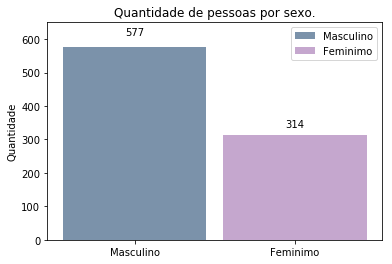

In [96]:

ind = numpy.arange(1)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, males_count, width, color='#7b92aa')

rects2 = ax.bar(ind + width + 0.04, females_count, width, color='#c5a7ce')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de pessoas por sexo.')
plt.xticks((ind, ind + width + 0.04), ('Masculino', 'Feminimo'))
#ax.set_xticklabels()
ax.set_ylim([0, 650])

ax.legend((rects1[0], rects2[0]), ('Masculino', 'Feminimo'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

E assim a primeira questão é satisfeita, agora será possível seguir para a segunda questão a qual este trabalho pretende responder.

### 2. Quantidade de crianças, adultos e idosos, categorizadas por sexo.

A busca por uma resposta para essa questão também percorrerá todo o ciclo iterativo de investigação, limpeza, exploração dos dados e se possível a comunicação visual dos mesmos.

Como se pode observar nos dados, existe uma coluna *Age* e ela contém aparentemente valores do tipo *float*, o código abaixo tentará confirmar esse pressuposto.

In [97]:
#Check Datatype Column
print "Tipo de dado: "+str(titanic_dataframe['Age'].dtype)

Tipo de dado: float64


Agora se verificará se existe algum problema com os dados da coluna *Age*, para isso será utilizado os dataframes *males* e *females* criados na questão anterior, esses dataframes serão utilizados pois eles já estão separados por sexo o que facilitará o trabalho na questão atual.

Antes de procurar por erros é preciso pressupor uma lista de erros que podem existir no conjunto de dados. No contexto atual foi imaginado 2 possíveis erros:

1. **Dados nulos:** Para a questão atual os dados serão categorizados por idade e sexo, como verificado na questão anterior os dados para sexo estão corretos, então agora será preciso descobrir se todos os registro(Passageiros) possuem a coluna *Age* não nula.
2. **Dados não numéricos:** Os dados da coluna *Age* identificam a idade do passageiro, é necessário que a idade seja em formato númerico, sendo assim será verificado se existe algum dado não númerico na coluna *Age*

O primeiro dataframe que será analisado será o dataframe *males* criado na questão de número 1:

In [6]:
#Check data males with errors
print "Males"

#Get all data males with null(NaN) in the column Age
males_errors = males[pandas.isnull(males['Age'])]

print "Quantidade erros: "+str(len(males_errors))
males_errors.head()

Males
Quantidade erros: 124


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C


O código acima identificou 124 dados nulos na coluna *Age* do dataframe *males*.

Agora será checado se existe algum no dataframe *females:*

In [7]:
print ""
print "Females"
females_errors = females[pandas.isnull(females['Age'])]
print "Quantidade erros: "+str(len(females_errors))
females_errors.head()


Females
Quantidade erros: 53


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q


Foram encontrados 53 dados nulos na coluna *Age* do dataframe feminino.

Agora que já é conhecido que a coluna *Age* de ambos os dataframes contém dados nulos é preciso criar um novo conjunto de dados contendo somente dados onde a coluna *Age* possui algum valor. Não é preciso se preocupar com a coluna sexo, pois já é sabido que ela possui todos os dados corretamente.

O próximo conjunto de códigos obterá somente os dados não nulos do conjunto *males* e *females*, além disso já será executado um teste nos dados para verificar se eles são númericos. Não é possível fazer esse teste antes de remover os registro com valores *NaN* na coluna *Age*, pois aparentemente numpy.isreal trata *NaN* como valor real.

Primeiro será criado um dataframe chamado *males_normalized* que conterá todos os registros que possuem valores válidos na coluna *Age* do dataframe *males*:

In [8]:
print ""
print "Males"
males_notnull = males[pandas.notnull(males['Age'])]
males_normalized = males_notnull[males_notnull['Age'].apply(numpy.isreal)]
print ""
#Check if all data about males is present
print "Erros: "+str(len(males_errors))
print "Válidos: "+str(len(males_normalized))
print "Total: "+str(len(males_errors) + len(males_normalized))+" = "+str(len(males))
print ""
print "Quantidade de dados válidos: "+str(len(males_normalized))
males_normalized.head()




Males

Erros: 124
Válidos: 453
Total: 577 = 577

Quantidade de dados válidos: 453


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


Agora será feito o mesmo com o dataframe *females* onde ao final do processo será gerado um dataframe chamado *females_normalized* que conterá todos os registros de *females* que possuem valores válidos na coluna *Age*

In [9]:
print ""
print "Females"
females_notnull = females[pandas.notnull(females['Age'])]
females_normalized = females_notnull[females_notnull['Age'].apply(numpy.isreal)]

print ""
#Check if all data about males is present
print "Erros: "+str(len(females_errors))
print "Válidos: "+str(len(females_normalized))
print "Total: "+str(len(females_errors) + len(females_normalized))+" = "+str(len(females))
print ""

print "Quantidade de dados válidos: "+str(len(females_normalized))
females_normalized.head()


Females

Erros: 53
Válidos: 261
Total: 314 = 314

Quantidade de dados válidos: 261


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Com os dataframes de *males_normalized* e *females_normalized* contendo somente dados válidos tanto para o sexo como para a idade é possível seprar os dados em crianças, adultos e idosos.

Para isso será definido as "classes" de idade para separar cada categoria:  
Crianças: [0 - 18[  
Adultos:  [18 - 50[  
Idosos:   [50 - +50]  

Definido o que significa crianças, adultos e idosos pode-se seguir para os dados:

In [10]:
boys = males_normalized[males_normalized['Age'] < 18]
girls = females_normalized[females_normalized['Age'] < 18]

men = males_normalized[(males_normalized['Age'] >= 18) & (males_normalized['Age'] < 50)]
women = females_normalized[(females_normalized['Age'] >= 18) & (females_normalized['Age'] < 50)]

old_men = males_normalized[males_normalized['Age'] >= 50]
old_women = females_normalized[females_normalized['Age'] >= 50]

Por fim será exibido somente os 5 primeiros registros de cada dataframe, assim será possível validar superficialmente se os dados estão corretos:

In [11]:
boys.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,NaN,S


In [12]:
girls.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S


In [13]:
men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.050,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.000,NaN,S


In [14]:
women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [15]:
old_men.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
94,95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.2500,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C


In [16]:
old_women.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
195,196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
259,260,1,2,"Parrish, Mrs. (Lutie Davis)",female,50.0,0,1,230433,26.0000,NaN,S


Aparentemente tudo está correto, sendo assim já é possível gerar um gráfico categorizando os passageiros, aqueles que possuem os dados válidos, por sexo e idade.

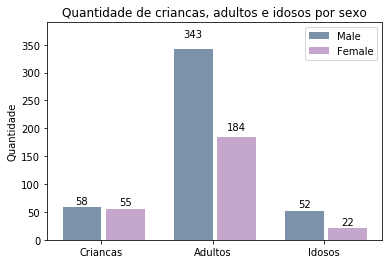

In [43]:
boys_count = len(boys)
girls_count = len(girls)

men_count = len(men)
women_count = len(women)

old_men_count = len(old_men)
old_women_count = len(old_women)

N = 3
males_sex = (boys_count, men_count, old_men_count)

ind = numpy.arange(N)
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(ind, males_sex, width, color='#7b92aa')

females_sex = (girls_count, women_count, old_women_count)
rects2 = ax.bar(ind + width + 0.04, females_sex, width, color='#c5a7ce')

ax.set_ylabel('Quantidade')
ax.set_title('Quantidade de criancas, adultos e idosos por sexo')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Criancas', 'Adultos', 'Idosos'))
ax.set_ylim([0, 390])

ax.legend((rects1[0], rects2[0]), ('Male', 'Female'))

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

E assim a questão 2 foi satisfeita, agora será proposto uma solução para a questão 3.

### 3. Sexo e idade maioria entre os sobreviventes.

Nessa última questão será realizado o mesmo processo das outras questões:

1. Investigação
2. Limpeza e correções
3. Exploração dos dados
4. Comunicação visual

O processo aparentemente será mais simples, já que boa parte do trabalho foi realizado na questão 2. Os dados já foram analisados e é sabido que existe uma coluna *Survied*, esta coluna possui valores que variam entre 0 e 1, sendo:

1. 0 = Não sobreviveu
2. 1 = Sobreviveu

Esses valores serão utilizados para satisfazer a questão atual. Já decididos os dados a serem utilizados é preciso verificar se existe algum problema com eles, o problema mais comum é a falta de algum valor, então assim como foi feito na questão 2, o código abaixo buscará por dados faltantes na coluna *Survived* para cada datraframe gerado na questão anterior.

In [100]:
print "Children"
boys_null_count = boys[pandas.isnull(boys['Survived'])]
print "Total null data in boys dataframe: "+str(len(boys_null_count))

girls_null_count = girls[pandas.isnull(girls['Survived'])]
print "Total null data in girls dataframe: "+str(len(girls_null_count))

print ""
print "Adults"
men_null_count = men[pandas.isnull(men['Survived'])]
print "Total null data in men dataframe: "+str(len(men_null_count))

women_null_count = women[pandas.isnull(women['Survived'])]
print "Total null data in women dataframe: "+str(len(women_null_count))

print ""
print "Elderly"
old_men_null_count = old_men[pandas.isnull(old_men['Survived'])]
print "Total null data in old_men dataframe: "+str(len(old_men_null_count))

old_women_null_count = old_women[pandas.isnull(old_women['Survived'])]
print "Total null data in old_women dataframe: "+str(len(old_women_null_count))

Children
Total null data in boys dataframe: 0
Total null data in girls dataframe: 0

Adults
Total null data in men dataframe: 0
Total null data in women dataframe: 0

Elderly
Total null data in old_men dataframe: 0
Total null data in old_women dataframe: 0


A aparentemente nenhum dado está faltando, então será verificado se existem dados diferente de 0 e 1 na coluna *Survived* de cada dataframe.

In [102]:
print "Children"
boys_invalid_count = boys[(boys['Survived'] != 0) & (boys['Survived'] != 1)]
print "Total invalid data in boys dataframe: "+str(len(boys_invalid_count))

girls_invalid_count = girls[(girls['Survived'] != 0) & (girls['Survived'] != 1)]
print "Total invalid data in girls dataframe: "+str(len(girls_invalid_count))

print ""
print "Adults"
men_invalid_count = men[(men['Survived'] != 0) & (men['Survived'] != 1)]
print "Total invalid data in men dataframe: "+str(len(men_invalid_count))

women_invalid_count = women[(women['Survived'] != 0) & (women['Survived'] != 1)]
print "Total invalid data in women dataframe: "+str(len(women_invalid_count))

print ""
print "Elderly"
old_men_invalid_count = old_men[(old_men['Survived'] != 0) & (old_men['Survived'] != 1)]
print "Total invalid data in old_men dataframe: "+str(len(old_men_invalid_count))

old_women_invalid_count = old_women[(old_women['Survived'] != 0) & (old_women['Survived'] != 1)]
print "Total invalid data in old_women dataframe: "+str(len(old_women_invalid_count))

Children
Total invalid data in boys dataframe: 0
Total invalid data in girls dataframe: 0

Adults
Total invalid data in men dataframe: 0
Total invalid data in women dataframe: 0

Elderly
Total invalid data in old_men dataframe: 0
Total invalid data in old_women dataframe: 0


E aparentemente nenhum dado é diferente de 0 e 1, sendo assim é possível avançar para exploração dos dados e por fim gerar uma visualização.

A intenção dessa questão é obter o sexo e a idade maioria entre os sobreviventes, para isso será selecionado somente os sobreviventes para cada dataframe: *boys*, *girls*, *men*, *women*, *old_men* e *old_women*, por fim será gerado uma visualização dos dados com a finalidade de explicitar um solução para a questão atual.

Para gerar novos dataframes contendo somente os sobreviventes, será buscado valores iguais a 1 na coluna *Survived* de cada dataframe, resultando novos dataframes contendo somente sobreviventes: *boys_survived*, *girls_survived*, *men_surivived*, *women_surivived*, *old_men_surivived* e *old_women_surivived*.

In [103]:
# Children survived
boys_survived = boys[boys['Survived'] == 1]
girls_survived = girls[girls['Survived'] == 1]

# Adults survived
men_surivived = men[men['Survived']==1]
women_surivived = women[women['Survived']==1]

# Elderly survived
old_men_surivived = old_men[old_men['Survived']==1]
old_women_surivived = old_women[old_women['Survived']==1]

E por fim será gerado a visualização com os valores dos novos dataframes criados no passo anterior:

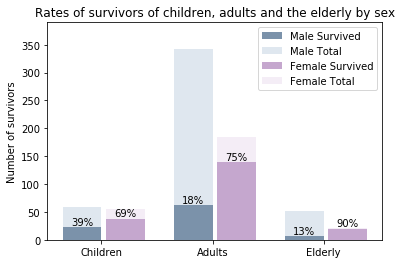

In [104]:
boys_count_survived = len(boys_survived)
girls_count_survived = len(girls_survived)

men_count_survived = len(men_surivived)
women_count_survived = len(women_surivived)

old_men_count_survived = len(old_men_surivived)
old_women_count_survived = len(old_women_surivived)

N = 3
males_sex_survived = (boys_count_survived, men_count_survived, old_men_count_survived)
males_sex = (boys_count-boys_count_survived, men_count-men_count_survived, old_men_count-old_men_count_survived)

ind = numpy.arange(N)
width = 0.35

fig, ax = plt.subplots()
rects1a = ax.bar(ind, males_sex_survived, width, color='#7b92aa')
rects1b = ax.bar(ind, males_sex, width, alpha=0.8, color='#D8E2EC', bottom=males_sex_survived)

females_sex_survived = (girls_count_survived, women_count_survived, old_women_count_survived)
females_sex = (girls_count - girls_count_survived, women_count - women_count_survived, old_women_count - old_women_count_survived)
rects2a = ax.bar(ind + width + 0.04, females_sex_survived, width, color='#c5a7ce')
rects2b = ax.bar(ind + width + 0.04, females_sex, width, color='#F4EDF6', bottom=females_sex_survived)

ax.set_ylabel('Number of survivors')
ax.set_title('Rates of survivors of children, adults and the elderly by sex')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Children', 'Adults', 'Elderly'))
ax.set_ylim([0, 390])

ax.legend((rects1a[0], rects1b[0], rects2a[0], rects2b[0]), ('Male Survived', 'Male Total', 'Female Survived', 'Female Total'))

def autolabel_survived(rects, rects_top):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in range(len(rects)):
        height = rects[rect].get_height()
        total = rects[rect].get_height() + rects_top[rect].get_height()
        percent = int((height * 100) / total)
        ax.text(x = rects[rect].get_x() + rects[rect].get_width()/2., y = height,
                s = '%s' % str(percent)+'%',
                ha='center', va='bottom')
        

autolabel_survived(rects1a, rects1b)
autolabel_survived(rects2a, rects2b)


plt.show()